# Importing the necessary libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
d

# Importing the dataset

In [4]:
dataset = pd.read_csv("C:\\Users\\Chandu\\Desktop\\Datasets\\Social_Network_Ads.csv")

In [5]:
#observe the dataset

dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,11021175,Male,42,121315,0
1,17782313,Male,53,67214,0
2,14603818,Female,59,111005,0
3,18188198,Female,39,53414,0
4,19357305,Male,39,114285,0


# Preprocessing the Dataset

In [6]:
#Getting the basic information of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Only 'Gender' is of object type

In [7]:
#Let's seperately check for only null values

dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
#Let's see the unique values of the 'Gender' column

dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
#Let's encode the 'Gender' column values

Label = LabelEncoder()
dataset['Gender']= Label.fit_transform(dataset['Gender'])
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,11021175,1,42,121315,0
1,17782313,1,53,67214,0
2,14603818,0,59,111005,0
3,18188198,0,39,53414,0
4,19357305,1,39,114285,0


In [10]:
#Let's see the encoded values of the 'Gender' column

dataset['Gender'].unique()

array([1, 0])

# Visualizing the Data

array([[<AxesSubplot:title={'center':'User ID'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>],
       [<AxesSubplot:title={'center':'Purchased'}>, <AxesSubplot:>]],
      dtype=object)

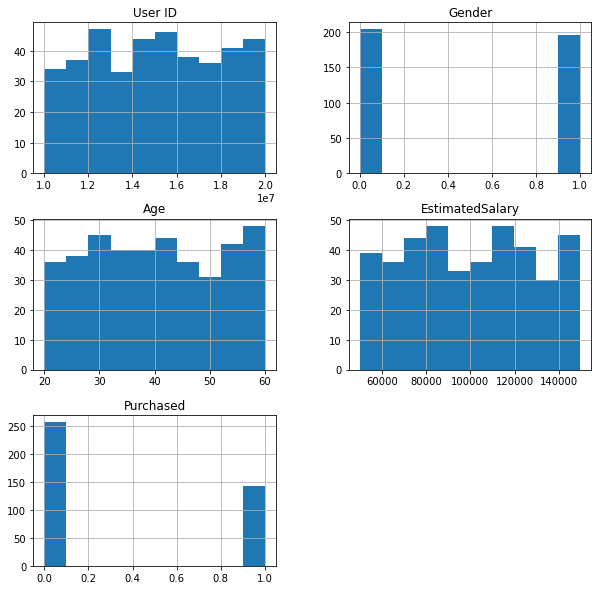

In [11]:
#Lets draw histogram graphs 

dataset.hist(figsize=(10,10),bins=10)

<AxesSubplot:>

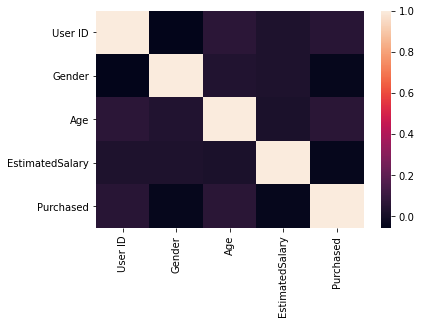

In [12]:
#Getting the heatmap
sns.heatmap(dataset.corr())

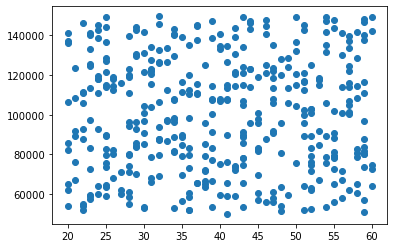

In [13]:
plt.scatter(dataset['Age'],dataset['EstimatedSalary'])

# Dividing into input and output

Let's take all the values except the first two and last column as our input values(independent variables) and the last column as our output(dependent variable).

In [14]:
x= dataset.iloc [:,2:4].values
print (x) 

[[    42 121315]
 [    53  67214]
 [    59 111005]
 [    39  53414]
 [    39 114285]
 [    39 107458]
 [    20  85582]
 [    59 148335]
 [    48  80579]
 [    42 114204]
 [    32  87786]
 [    49 113544]
 [    55  88300]
 [    54 147066]
 [    57 139622]
 [    41 134716]
 [    51 116333]
 [    55  72567]
 [    44 123254]
 [    47 113548]
 [    52  79343]
 [    20 106149]
 [    40  59674]
 [    52  76333]
 [    28 118742]
 [    22 105897]
 [    25 114815]
 [    38  85428]
 [    57 114005]
 [    57 133402]
 [    43 106726]
 [    35  84550]
 [    34  96296]
 [    32  68964]
 [    55  90946]
 [    48  51787]
 [    22  53940]
 [    42 138928]
 [    59 116474]
 [    23  97284]
 [    40 132951]
 [    24 119308]
 [    50 120675]
 [    41 113547]
 [    52 102686]
 [    34 140262]
 [    20  54075]
 [    25  63715]
 [    46  56058]
 [    58  65052]
 [    38  72107]
 [    21 108656]
 [    42 120639]
 [    31  68033]
 [    26  80283]
 [    47  60952]
 [    31 123137]
 [    36  98529]
 [    25 12130

In [15]:
y = dataset.iloc[:,4].values
print (y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


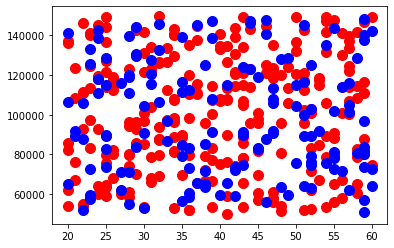

In [16]:
plt.scatter (x[y == 0,0],x[y == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y == 1,0],x[y == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.show()

# Feature Scaling – Standardization (To standardize Salary)

In [17]:
sc_x= StandardScaler()
x = sc_x.fit_transform(x)
print (x)

[[ 0.17951354  0.76103154]
 [ 1.11315372 -1.14804259]
 [ 1.622412    0.39722026]
 [-0.0751156  -1.63500628]
 [-0.0751156   0.51296235]
 [-0.0751156   0.27205647]
 [-1.68776681 -0.49988685]
 [ 1.622412    1.71449234]
 [ 0.68877182 -0.67642883]
 [ 0.17951354  0.51010409]
 [-0.66925025 -0.42211381]
 [ 0.7736482   0.48681452]
 [ 1.28290648 -0.40397617]
 [ 1.1980301   1.66971285]
 [ 1.45265924  1.40703476]
 [ 0.09463716  1.23391563]
 [ 0.94340096  0.58523059]
 [ 1.28290648 -0.95915007]
 [ 0.3492663   0.82945347]
 [ 0.60389544  0.48695567]
 [ 1.02827734 -0.72004384]
 [-1.68776681  0.2258655 ]
 [ 0.00976078 -1.41410826]
 [ 1.02827734 -0.82625839]
 [-1.00875577  0.67023751]
 [-1.51801405  0.21697311]
 [-1.26338491  0.53166458]
 [-0.15999198 -0.50532108]
 [ 1.45265924  0.50308193]
 [ 1.45265924  1.18754822]
 [ 0.26438992  0.24622622]
 [-0.41462111 -0.53630326]
 [-0.49949749 -0.12181953]
 [-0.66925025 -1.08628994]
 [ 1.28290648 -0.31060618]
 [ 0.68877182 -1.6924186 ]
 [-1.51801405 -1.6164452 ]
 

In [18]:
x.shape, y.shape

((400, 2), (400,))

# Dividing the dataset into Train and Test parts

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

In [20]:
x_train.shape

(320, 2)

In [21]:
x_test.shape

(80, 2)

In [22]:
y_test.shape

(80,)

In [23]:
y_train.shape

(320,)

# Running a Classifier

In [25]:
knn = KNeighborsClassifier()


# Fitting the model

In [ ]:
knn =knn.fit (x_train, y_train)

# Predicting the output

In [30]:
y_pred =knn.predict(x_test)#defaul n =5
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

# Evaluating the Accuracy score of the model

In [35]:
accuracy_score (y_test,y_pred)*100

62.5

In [32]:
y_pred_x =knn.predict(x)
y_pred_x

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,

In [34]:
accuracy_score (y,y_pred_x)*100

70.0

# Improving the model

In [36]:
#Metric to use for distance computation. Default is “minkowski”, which results in the standard Euclidean distance when p = 2 or
#manhattan_distance if p = 1  

In [37]:
classifier = KNeighborsClassifier(n_neighbors =1 , metric = 'minkowski', p= 2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
y_pred =classifier.predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,

In [40]:
accuracy_score (y,y_pred)*100


91.0

In [41]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =1 , metric = 'minkowski', p= 1)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [43]:
y_pred_P1 =classifier.predict(x)
y_pred_P1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score (y,y_pred_P1)*100

91.25